In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Putting data together**

In [2]:
# prompt: import a .csv dataset

import pandas as pd
mvp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL Fall 2024/MSPR predictions/datasets/mvp_train(all terms).csv')
print(mvp_df.head())


   ATTENDANCE  LOW PARTICIPATION  LATE/MISSING ASSIGNMENTS  \
0           0                  0                         0   
1           0                  0                         0   
2           0                  0                         0   
3           0                  0                         0   
4           1                  0                         0   

   OTHER ASSIGNMENTS CONCERNS  LOW TEST SCORES  DANGER of UNSATING  \
0                           0                0                   0   
1                           0                1                   1   
2                           0                0                   0   
3                           0                0                   0   
4                           0                0                   0   

   DESIGNATION_BINARY  
0                   1  
1                   1  
2                   1  
3                   1  
4                   0  


In [3]:
mvp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ATTENDANCE                  4530 non-null   int64
 1   LOW PARTICIPATION           4530 non-null   int64
 2   LATE/MISSING ASSIGNMENTS    4530 non-null   int64
 3   OTHER ASSIGNMENTS CONCERNS  4530 non-null   int64
 4   LOW TEST SCORES             4530 non-null   int64
 5   DANGER of UNSATING          4530 non-null   int64
 6   DESIGNATION_BINARY          4530 non-null   int64
dtypes: int64(7)
memory usage: 247.9 KB


In [4]:
# prompt: show distributions for fields in the mvp_df, show distributions in terms of count and percentage

# Calculate counts and percentages for each column
for col in mvp_df.columns:
  print(f"Distribution for column: {col}")
  counts = mvp_df[col].value_counts()
  percentages = (counts / len(mvp_df)) * 100
  distribution_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
  print(distribution_df)
  print("-" * 20)

Distribution for column: ATTENDANCE
            Count  Percentage
ATTENDANCE                   
0            3913   86.379691
1             441    9.735099
2             117    2.582781
3              48    1.059603
4              10    0.220751
5               1    0.022075
--------------------
Distribution for column: LOW PARTICIPATION
                   Count  Percentage
LOW PARTICIPATION                   
0                   3881   85.673289
1                    529   11.677704
2                     98    2.163355
3                     22    0.485651
--------------------
Distribution for column: LATE/MISSING ASSIGNMENTS
                          Count  Percentage
LATE/MISSING ASSIGNMENTS                   
0                          3331   73.532009
1                           791   17.461369
2                           281    6.203091
3                           109    2.406181
4                            17    0.375276
5                             1    0.022075
---------------

**Stratified sampling for train, val, and test data**

In [5]:
# prompt: Split mvp_df into train, validation, and test. Use stratified splitting to maintain class balance across sets.

from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(mvp_df, test_size=0.3, stratify=mvp_df['DESIGNATION_BINARY'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['DESIGNATION_BINARY'], random_state=42)

print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (3171, 7)
Validation set shape: (679, 7)
Test set shape: (680, 7)


In [6]:
# prompt: Show distributions of DESIGNATION_BINARY in train_df, val_df, and test_df

def show_distribution(df, name):
    print(f"Distribution for {name}:")
    counts = df['DESIGNATION_BINARY'].value_counts()
    percentages = (counts / len(df)) * 100
    distribution_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(distribution_df)
    print("-" * 20)

show_distribution(train_df, "train_df")
show_distribution(val_df, "val_df")
show_distribution(test_df, "test_df")

Distribution for train_df:
                    Count  Percentage
DESIGNATION_BINARY                   
1                    2879   90.791548
0                     292    9.208452
--------------------
Distribution for val_df:
                    Count  Percentage
DESIGNATION_BINARY                   
1                     617   90.868925
0                      62    9.131075
--------------------
Distribution for test_df:
                    Count  Percentage
DESIGNATION_BINARY                   
1                     617   90.735294
0                      63    9.264706
--------------------


In [7]:
# prompt: Split train_df into X_train and y_train. Split val_df into X_val and y_val. Split test_df into X_test and y_test.

X_train = train_df.drop('DESIGNATION_BINARY', axis=1)
y_train = train_df['DESIGNATION_BINARY']

X_val = val_df.drop('DESIGNATION_BINARY', axis=1)
y_val = val_df['DESIGNATION_BINARY']

X_test = test_df.drop('DESIGNATION_BINARY', axis=1)
y_test = test_df['DESIGNATION_BINARY']

**Standartization**

In [8]:
# prompt: Standardize X_train. Then standardize X_val and X_test. Use from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on X_train and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_val and X_test using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [9]:
# prompt: Print mean and std of X_train_scaled, X_val_scaled, and X_test_scaled

import numpy as np

print("Mean of X_train_scaled:", np.mean(X_train_scaled))
print("Standard deviation of X_train_scaled:", np.std(X_train_scaled))

print("Mean of X_val_scaled:", np.mean(X_val_scaled))
print("Standard deviation of X_val_scaled:", np.std(X_val_scaled))

print("Mean of X_test_scaled:", np.mean(X_test_scaled))
print("Standard deviation of X_test_scaled:", np.std(X_test_scaled))

Mean of X_train_scaled: 0.0
Standard deviation of X_train_scaled: 1.0
Mean of X_val_scaled: 0.041313408948414024
Standard deviation of X_val_scaled: 1.0678334789113186
Mean of X_test_scaled: 0.027231254798653758
Standard deviation of X_test_scaled: 1.0407539151632823


**SMOTE (balance classes for label)**

In [10]:
# prompt: Use SMOTE on X_train and y_train, to fix unbalance in DESIGNATION_BINARY class distribution

#!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print()
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

print()
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

print()
print("Distribution of y_train_resampled:")
print(y_train_resampled.value_counts())


Shape of X_train_scaled: (3171, 6)
Shape of y_train: (3171,)

Shape of X_train_resampled: (5758, 6)
Shape of y_train_resampled: (5758,)

Distribution of y_train_resampled:
DESIGNATION_BINARY
1    2879
0    2879
Name: count, dtype: int64


**Baseline model: Logistic**

In [11]:
# prompt: Fit a Logistic regression on train data sets, validate on the validation data sets. Record performance metrics for further comparison.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_val_pred = logreg_model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)


print("Logistic Regression Performance Metrics (Validation Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

performance_metrics = {
    'model': 'Logistic Regression',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc
}

Logistic Regression Performance Metrics (Validation Set):
Accuracy: 0.8262
Precision: 0.9646
Recall: 0.8395
F1-score: 0.8977
ROC AUC: 0.7665


**Logistic Model: Tuning**

In [12]:
# prompt: Use grid search and cross validation for hyperparameter tuning for the Logistic regression. Record performance metrics.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'] # Solvers that support both penalties
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)


# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best Hyperparameters:", best_params)

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)


print("Logistic Regression Performance Metrics After Tuning (Validation Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

performance_metrics_log_val = {
    'model': 'Tuned Logistic Regression',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc
}

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)


print("Logistic Regression Performance Metrics After Tuning (Testing set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

performance_metrics = {
    'model': 'Tuned Logistic Regression',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc
}

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Performance Metrics After Tuning (Validation Set):
Accuracy: 0.8424
Precision: 0.9636
Recall: 0.8590
F1-score: 0.9083
ROC AUC: 0.7682
Logistic Regression Performance Metrics After Tuning (Testing set):
Accuracy: 0.8294
Precision: 0.9596
Recall: 0.8476
F1-score: 0.9002
ROC AUC: 0.7492


**Neural Network for binary classification**

In [13]:
# prompt: Fit a Neural Network that would be well suited for binary classification on a relatively small dataset. Fit on train data, evaluate on the validation data. Record performance metrics.

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    keras.layers.Dropout(0.3),  # Add dropout for regularization
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val))


# Make predictions on the validation set
y_val_pred_prob = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions

# Evaluate the model (validation set)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)


print("Neural Network Performance Metrics (Validation Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

performance_metrics = {
    'model': 'Neural Network',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc
}

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5945 - loss: 0.7090 - val_accuracy: 0.7172 - val_loss: 0.5916
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7614 - loss: 0.5288 - val_accuracy: 0.7850 - val_loss: 0.5202
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7785 - loss: 0.5011 - val_accuracy: 0.7894 - val_loss: 0.4830
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7785 - loss: 0.5019 - val_accuracy: 0.7791 - val_loss: 0.5229
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7951 - loss: 0.4922 - val_accuracy: 0.7953 - val_loss: 0.5001
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7851 - loss: 0.5034 - val_accuracy: 0.8056 - val_loss: 0.4943
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7851 - loss: 0.5037 - val_accuracy: 0.8041 - val_loss: 0.4985
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7865 - loss: 0.4981 - val_accuracy: 0.7923 - val_

In [ ]:
!pip install scikeras

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras

# Define the parameter grid for the neural network
param_grid = {
    'model__units1': [32, 64, 128],
    'model__units2': [16, 32, 64],
    'model__dropout1': [0.3, 0.5, 0.7],
    'model__dropout2': [0.2, 0.4, 0.6],
    'batch_size': [32],
    'epochs': [30]
}

# Function to create and compile the model
def create_model(units1, units2, dropout1, dropout2, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(units1, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        keras.layers.Dropout(dropout1),
        keras.layers.Dense(units2, activation='relu'),
        keras.layers.Dropout(dropout2),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Use KerasClassifier for Scikit-learn compatibility
model = KerasClassifier(model=create_model, verbose=0)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate the best model on the validation set
best_model = grid_result.best_estimator_
y_val_pred_prob = best_model.predict_proba(X_val_scaled)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

# Evaluate the model
# Ensure the labels are binary
# y_val = LabelEncoder().fit_transform(y_val)

# # Compute metrics
# accuracy = accuracy_score(y_val, y_val_pred)
# precision = precision_score(y_val, y_val_pred)
# recall = recall_score(y_val, y_val_pred)
# f1 = f1_score(y_val, y_val_pred)
# roc_auc = roc_auc_score(y_val, y_val_pred_prob)

# # Print metrics
# print("Tuned Neural Network Performance Metrics (Validation Set):")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-score: {f1:.4f}")
# print(f"ROC AUC: {roc_auc:.4f}")


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.814410197546022 using {'batch_size': 32, 'epochs': 30, 'model__dropout1': 0.3, 'model__dropout2': 0.2, 'model__units1': 128, 'model__units2': 32}


In [ ]:
#more systematic tuning
#1 tune on learning rate
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]

for lr in learning_rates:
    # Create a new model instance for each learning rate
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model with the current learning rate
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print(f"Training with learning rate: {lr}")
    model.fit(X_train_resampled, y_train_resampled, epochs=10, validation_data=(X_val_scaled, y_val))

    #0.01 learning rate looks like a good bet


Training with learning rate: 0.0001
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5029 - loss: 0.7025 - val_accuracy: 0.6186 - val_loss: 0.7310
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6240 - loss: 0.6541 - val_accuracy: 0.6082 - val_loss: 0.7087
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7011 - loss: 0.6190 - val_accuracy: 0.6053 - val_loss: 0.6805
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7204 - loss: 0.5953 - val_accuracy: 0.6613 - val_loss: 0.6525
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7358 - loss: 0.5677 - val_accuracy: 0.7010 - val_loss: 0.6283
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.5533 - val_accuracy: 0.7305 - val_loss: 0.6040
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7514 - loss: 0.5331 - val_accuracy: 0.7393 - val_loss: 0.5841
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7597 - loss: 0.5318 - val_accuracy: 0.7393 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with dropout rate: 0.2
Training with dropout rate: 0.3
Training with dropout rate: 0.4
Training with dropout rate: 0.5


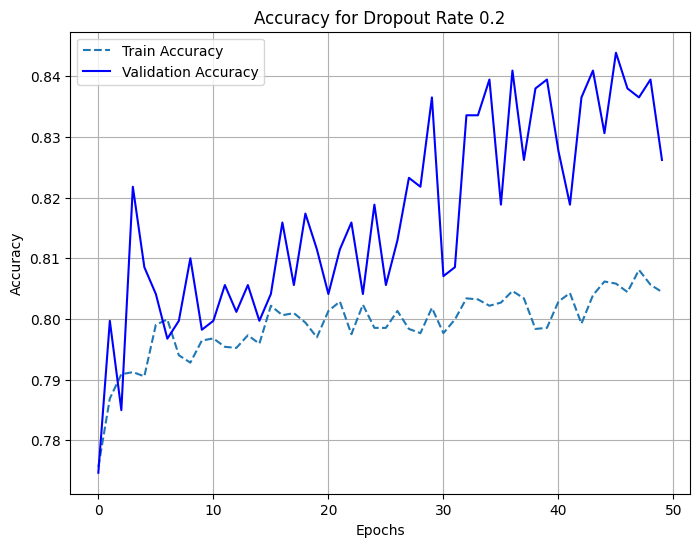

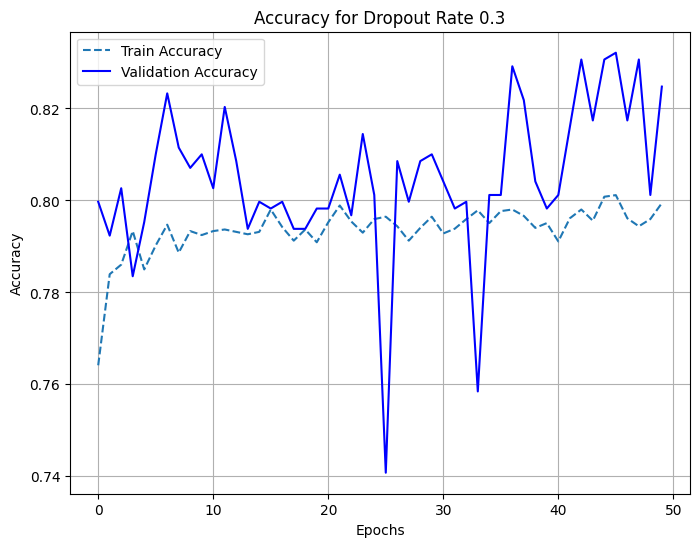

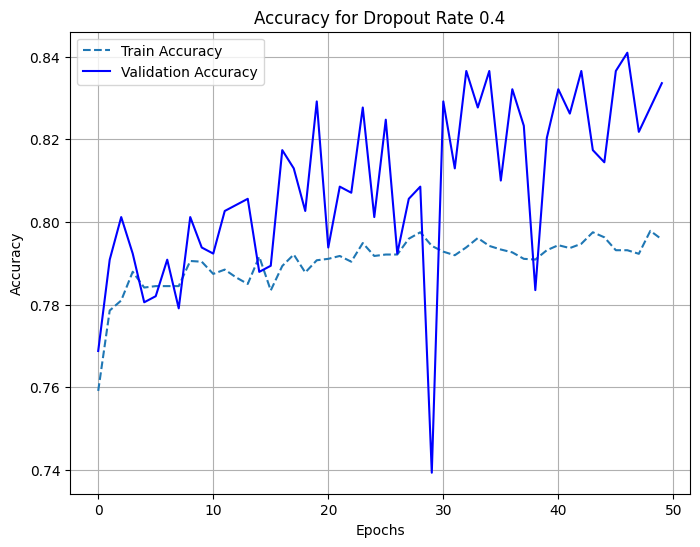

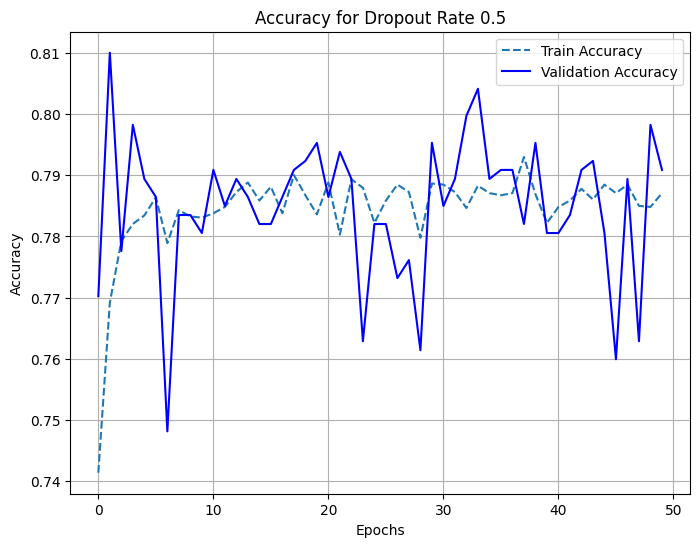

In [ ]:
#tuning
#2 dropout rates

import matplotlib.pyplot as plt

# Dropout rates to tune
dropout_rates = [0.2, 0.3, 0.4, 0.5]

# Store results for plotting
history_results = {}

for rate in dropout_rates:
    # Create a new model instance for each dropout rate
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dropout(rate),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(rate),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model with accuracy as a metric
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model and store training history
    print(f"Training with dropout rate: {rate}")
    history = model.fit(
        X_train_resampled, y_train_resampled,
        epochs=50,
        validation_data=(X_val_scaled, y_val),
        verbose=0  # Suppress per-epoch output
    )

    # Store history for plotting
    history_results[rate] = history.history

# Plot separate graphs for accuracy for each dropout rate
for rate, history in history_results.items():
    plt.figure(figsize=(8, 6))

    # Plot training and validation accuracy
    plt.plot(history['accuracy'], label='Train Accuracy', linestyle='dashed')
    plt.plot(history['val_accuracy'], label='Validation Accuracy', color='blue')

    # Graph customization
    plt.title(f'Accuracy for Dropout Rate {rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Show the graph for the current dropout rate
    plt.show()


In [ ]:
!pip install scikeras

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras

# Define the parameter grid for the neural network
param_grid = {
    'model__units1': [16, 32, 64, 128],
    'model__units2': [8, 16, 32, 64],
    'model__dropout': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [30]
}

# Function to create and compile the model
def create_model(units1, units2, dropout, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(units1, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(units2, activation='relu'),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Use KerasClassifier for Scikit-learn compatibility
model = KerasClassifier(model=create_model, verbose=0)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [19]:
!pip install scikeras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras

#best model from tuning above (execution failed to some code after the tuning)
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=64, validation_data=(X_val_scaled, y_val))

# Evaluate the best model on the validation set
y_val_pred_prob = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

#Evaluate the model
#Ensure the labels are binary
y_val = LabelEncoder().fit_transform(y_val)

# Compute metrics (val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

# Print metrics
print("Tuned Neural Network Performance Metrics (Validation Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Evaluate the best model on the validation set
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

#Evaluate the model
#Ensure the labels are binary
y_test = LabelEncoder().fit_transform(y_test)

# Compute metrics (test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Print metrics
print("Tuned Neural Network Performance Metrics (Test Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7780 - loss: 0.5087 - val_accuracy: 0.8071 - val_loss: 0.4277
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4834 - val_accuracy: 0.7290 - val_loss: 0.5677
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4877 - val_accuracy: 0.7997 - val_loss: 0.4872
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.4721 - val_accuracy: 0.8071 - val_loss: 0.5160
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4767 - val_accuracy: 0.7968 - val_loss: 0.4524
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.4827 - val_accuracy: 0.8130 - val_loss: 0.5372
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.4794 - val_accuracy: 0.7982 - val_loss: 0.4287
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.4747 - val_accuracy: 0.8027 - val_loss: 0.5

In [14]:
#trying with 3 hidden layers

!pip install scikeras

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras

# Define the parameter grid for the neural network
param_grid = {
    'model__units1': [16, 32, 64, 128],
    'model__units2': [16, 32, 64, 128],
    'model__units3': [16, 32, 64, 128],
    'model__dropout': [0.2, 0.3],
    'batch_size': [32, 64],
    'epochs': [30]
}

# Function to create and compile the model
def create_model(units1, units2, units3, dropout, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(units1, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(units2, activation='relu'),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(units3, activation='relu'),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Use KerasClassifier for Scikit-learn compatibility
model = KerasClassifier(model=create_model, verbose=0)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.819534386550993 using {'batch_size': 64, 'epochs': 30, 'model__dropout': 0.2, 'model__units1': 128, 'model__units2': 128, 'model__units3': 32}


In [15]:
!pip install scikeras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras

#best model from tuning above (execution failed to some code after the tuning)
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=64, validation_data=(X_val_scaled, y_val))

# Evaluate the best model on the validation set
y_val_pred_prob = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

#Evaluate the model
#Ensure the labels are binary
y_val = LabelEncoder().fit_transform(y_val)

# Compute metrics (val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

# Print metrics
print("Tuned Neural Network Performance Metrics 3 hidden (Validation Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Evaluate the best model on the validation set
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

#Evaluate the model
#Ensure the labels are binary
y_test = LabelEncoder().fit_transform(y_test)

# Compute metrics (test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Print metrics
print("Tuned Neural Network Performance Metrics 3 hidden (Test Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7546 - loss: 0.5292 - val_accuracy: 0.8027 - val_loss: 0.4942
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4855 - val_accuracy: 0.8100 - val_loss: 0.4290
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7935 - loss: 0.4869 - val_accuracy: 0.7953 - val_loss: 0.4369
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.4804 - val_accuracy: 0.7761 - val_loss: 0.6227
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7935 - loss: 0.4874 - val_accuracy: 0.7820 - val_loss: 0.5548
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.4932 - val_accuracy: 0.8130 - val_loss: 0.5589
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7971 - loss: 0.4858 - val_accuracy: 0.8277 - val_loss: 0.4601
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4917 - val_accuracy: 0.8115 - val_loss: 0.4